In [1]:
# 8-15 January
import pandas as pd
import numpy as np
from io import StringIO


data = pd.read_csv('../datasets/2011.ehpcsv.txt')
data['time'] = pd.to_datetime(data['time'])

start_date = '2011-01-08'
end_date = '2011-01-15'
filtered_data = data[(data['time'] >= start_date) & (data['time'] <= end_date)] # By Date
filtered_data = filtered_data[filtered_data['place'].str.contains('Cobb', case=False, na=False)] # By Location
filtered_data.to_csv('../datasets/filtered_data.csv', index=False)


## FX Helper

In [2]:
import csv
def saveValidShapeletAsCsv(file='series_a', shapelets=[]):
    csv_file_path = f'{file}.csv'

    # Open the CSV file in write mode
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['shapelet', 'ig'])
        
        for entry in shapelets:
            shapelet = entry['shapelet']
            val_ig = entry['IG']
            shapelet_str = ', '.join(map(str, shapelet))
            writer.writerow([shapelet_str, val_ig])

    print(f"Data saved to {csv_file_path}")

def loadShapeletFromCsv(file='series_a'):
    csv_file_path = f'{file}.csv'
    shapelets = []

    # Open the CSV file in read mode
    with open(csv_file_path, mode='r') as file:
        reader = csv.DictReader(file)
        
        for row in reader:
            shapelet_str = row['shapelet']
            ig = float(row['ig'])  # Convert 'ig' to float
            shapelet = list(map(float, shapelet_str.split(', ')))  # Convert shapelet string back to list of floats
            shapelets.append({'shapelet': shapelet, 'IG': ig})
    
    return shapelets

In [3]:
filtered_data.reset_index(drop=True, inplace=True)
filtered_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2011-01-08 06:02:38.930000+00:00,38.82433,-122.78883,0.798,0.89,d,7,223.0,1.0,0.06,...,2011-01-08T06:04:10.000Z,"Cobb, CA",eq,0.95,0.57,0.01,9,A,NC,NC
1,2011-01-08 06:15:37.280000+00:00,38.82217,-122.77866,-0.193,0.45,d,6,131.0,1.0,0.01,...,2011-01-08T06:17:10.000Z,"Cobb, CA",eq,0.30,0.75,0.06,8,A,NC,NC
2,2011-01-08 07:06:47.440000+00:00,38.84184,-122.79034,-0.832,0.43,d,5,163.0,3.0,0.01,...,2011-01-08T07:08:21.000Z,"Cobb, CA",eq,0.74,4.11,0.13,7,A,NC,NC
3,2011-01-08 07:31:32.160000+00:00,38.83567,-122.80550,0.214,0.38,d,8,68.0,1.0,0.03,...,2011-01-08T07:33:05.000Z,"Cobb, CA",eq,0.28,1.05,0.07,8,A,NC,NC
4,2011-01-08 12:00:34.180000+00:00,38.83800,-122.78400,1.540,1.18,d,57,82.0,1.0,0.07,...,2011-01-12T19:13:44.000Z,"Cobb, CA",eq,0.12,0.16,0.12,14,F,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2011-01-14 05:41:57.310000+00:00,38.83000,-122.80200,1.273,0.88,d,11,95.0,1.0,0.02,...,2011-01-14T05:43:31.000Z,"Cobb, CA",eq,0.36,0.48,0.03,13,A,NC,NC
67,2011-01-14 08:06:04.040000+00:00,38.83533,-122.78584,1.356,0.88,d,10,142.0,2.0,0.04,...,2011-01-14T08:07:36.000Z,"Cobb, CA",eq,0.34,0.59,0.08,11,A,NC,NC
68,2011-01-14 15:30:59.260000+00:00,38.83083,-122.79300,1.843,1.13,d,40,42.0,1.0,0.06,...,2011-01-14T21:04:53.000Z,"Cobb, CA",eq,0.16,0.21,0.12,8,F,NC,NC
69,2011-01-14 16:53:29.650000+00:00,38.83983,-122.82684,1.006,0.19,d,6,131.0,2.0,0.03,...,2011-01-14T16:55:02.000Z,"Cobb, CA",eq,0.49,0.74,0.11,7,A,NC,NC


# Basic EDA
---
From this step we found that there's 2 class that indicated by feature 'status'. It is class reflecting on environmental condition:
Class A (Low): Reflects signals during regular, undisturbed conditions.
Class F (High): Could occur during phenomena such as storms, explosions, or other events that generate intense waves or signals.

When the series split by class, it proof that the class F is less frequent and has higher value in 'mag' or magnitude.


In [5]:
display(filtered_data["status"].unique())
display(filtered_data["type"].unique())
display(filtered_data.columns)

array(['A', 'F'], dtype=object)

array(['eq'], dtype=object)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

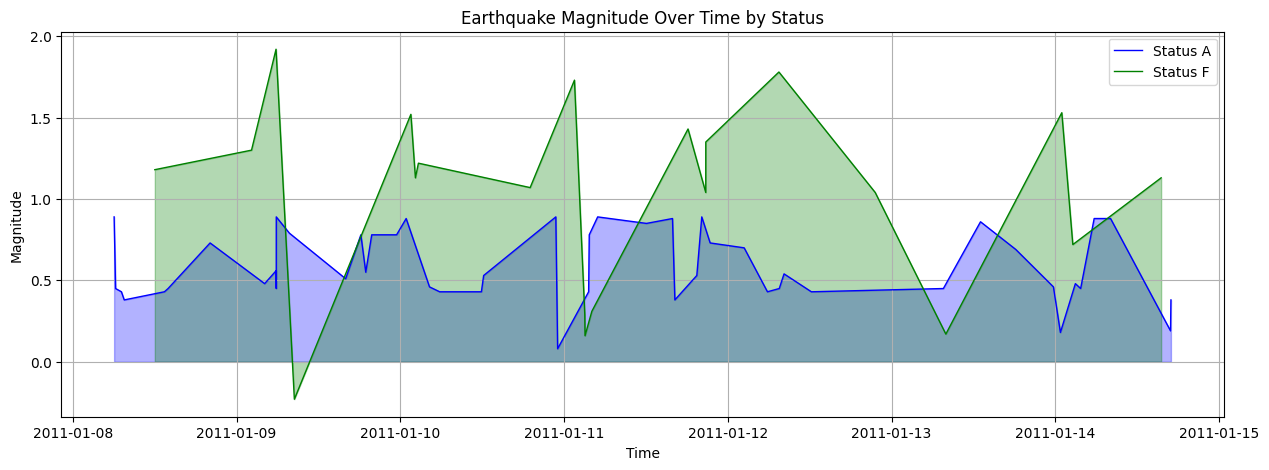

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

dataframe = filtered_data

dataframe['time'] = pd.to_datetime(dataframe['time'])
# dataframe = dataframe.sort_values(by='time')

data_A = dataframe[dataframe['status'] == 'A']
data_F = dataframe[dataframe['status'] == 'F']

# Plot the data
plt.figure(figsize=(15, 5))

# Plot data for status A
plt.plot(data_A['time'], data_A['mag'], color='blue', linewidth=1, label='Status A')
plt.fill_between(data_A['time'], data_A['mag'], color='blue', alpha=0.3)

# Plot data for status F
plt.plot(data_F['time'], data_F['mag'], color='green', linewidth=1, label='Status F')
plt.fill_between(data_F['time'], data_F['mag'], color='green', alpha=0.3)

plt.title('Earthquake Magnitude Over Time by Status')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.show()


In [7]:
dataframe[['time','mag','status']].head(15)

,time,mag,status
0,2011-01-08 06:02:38.930000+00:00,0.89,A
1,2011-01-08 06:15:37.280000+00:00,0.45,A
2,2011-01-08 07:06:47.440000+00:00,0.43,A
3,2011-01-08 07:31:32.160000+00:00,0.38,A
4,2011-01-08 12:00:34.180000+00:00,1.18,F
5,2011-01-08 13:24:23.170000+00:00,0.43,A
6,2011-01-08 13:24:55.950000+00:00,0.43,A
7,2011-01-08 13:57:12.200000+00:00,0.45,A
8,2011-01-08 20:06:40.920000+00:00,0.73,A
9,2011-01-09 02:11:03.640000+00:00,1.30,F


<Figure size 2500x500 with 0 Axes>

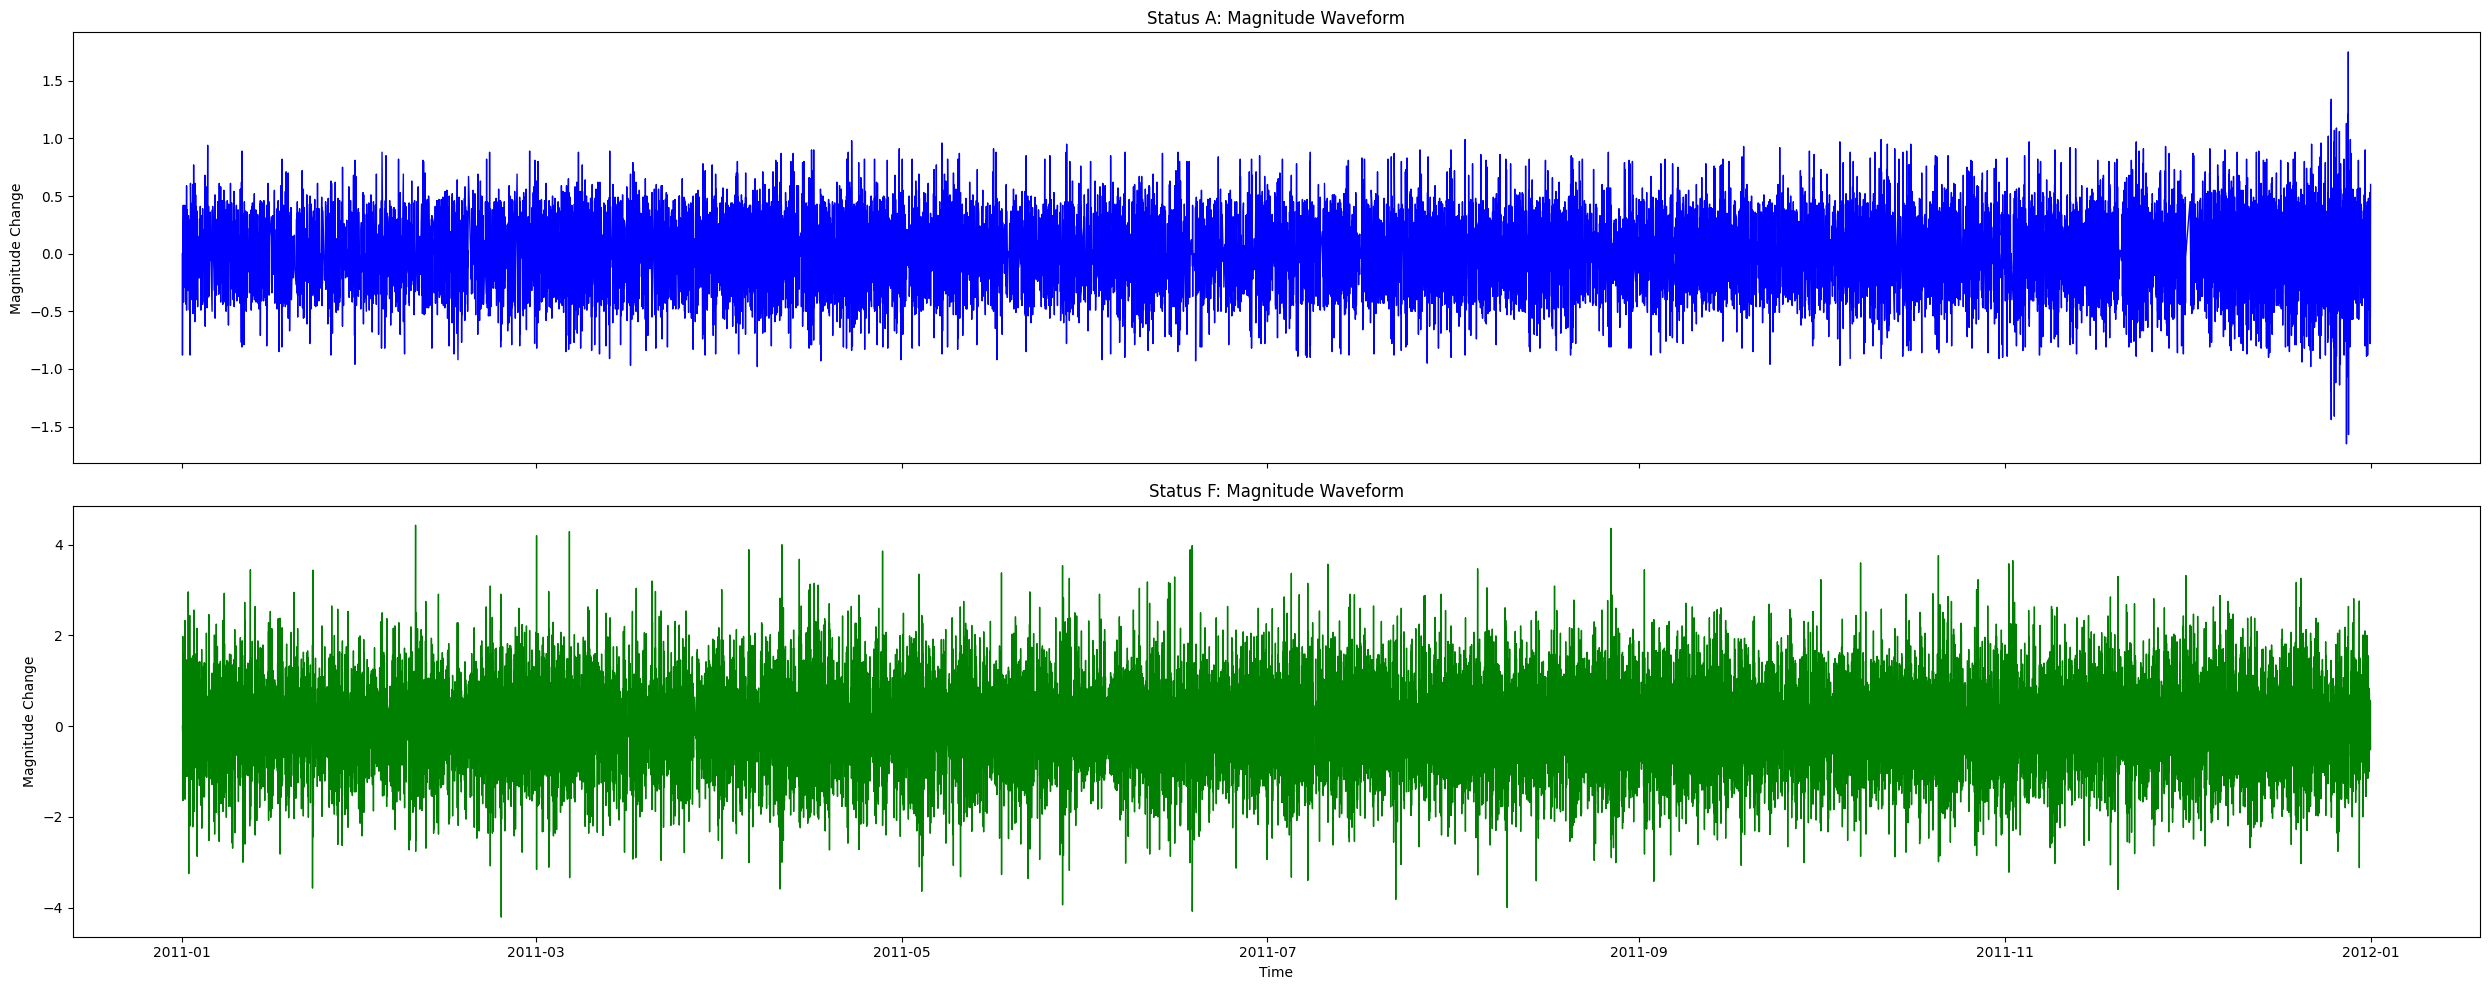

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
data['time'] = pd.to_datetime(data['time'])

# Split data by status
data_a = data[data['status'] == 'A'].copy()
data_f = data[data['status'] == 'F'].copy()

# magnitude_waveform
data_a['mag_wf'] = data_a['mag'].diff().fillna(0)
data_f['mag_wf'] = data_f['mag'].diff().fillna(0)

plt.figure(figsize=(25, 5))

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

# Plot status A
ax[0].plot(data_a['time'], data_a['mag_wf'], color='blue', linewidth=1)
ax[0].set_title('Status A: Magnitude Waveform')
ax[0].set_ylabel('Magnitude Change')
ax[0].grid(False)

# Plot status F
ax[1].plot(data_f['time'], data_f['mag_wf'], color='green', linewidth=1)
ax[1].set_title('Status F: Magnitude Waveform')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitude Change')
ax[1].grid(False)

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

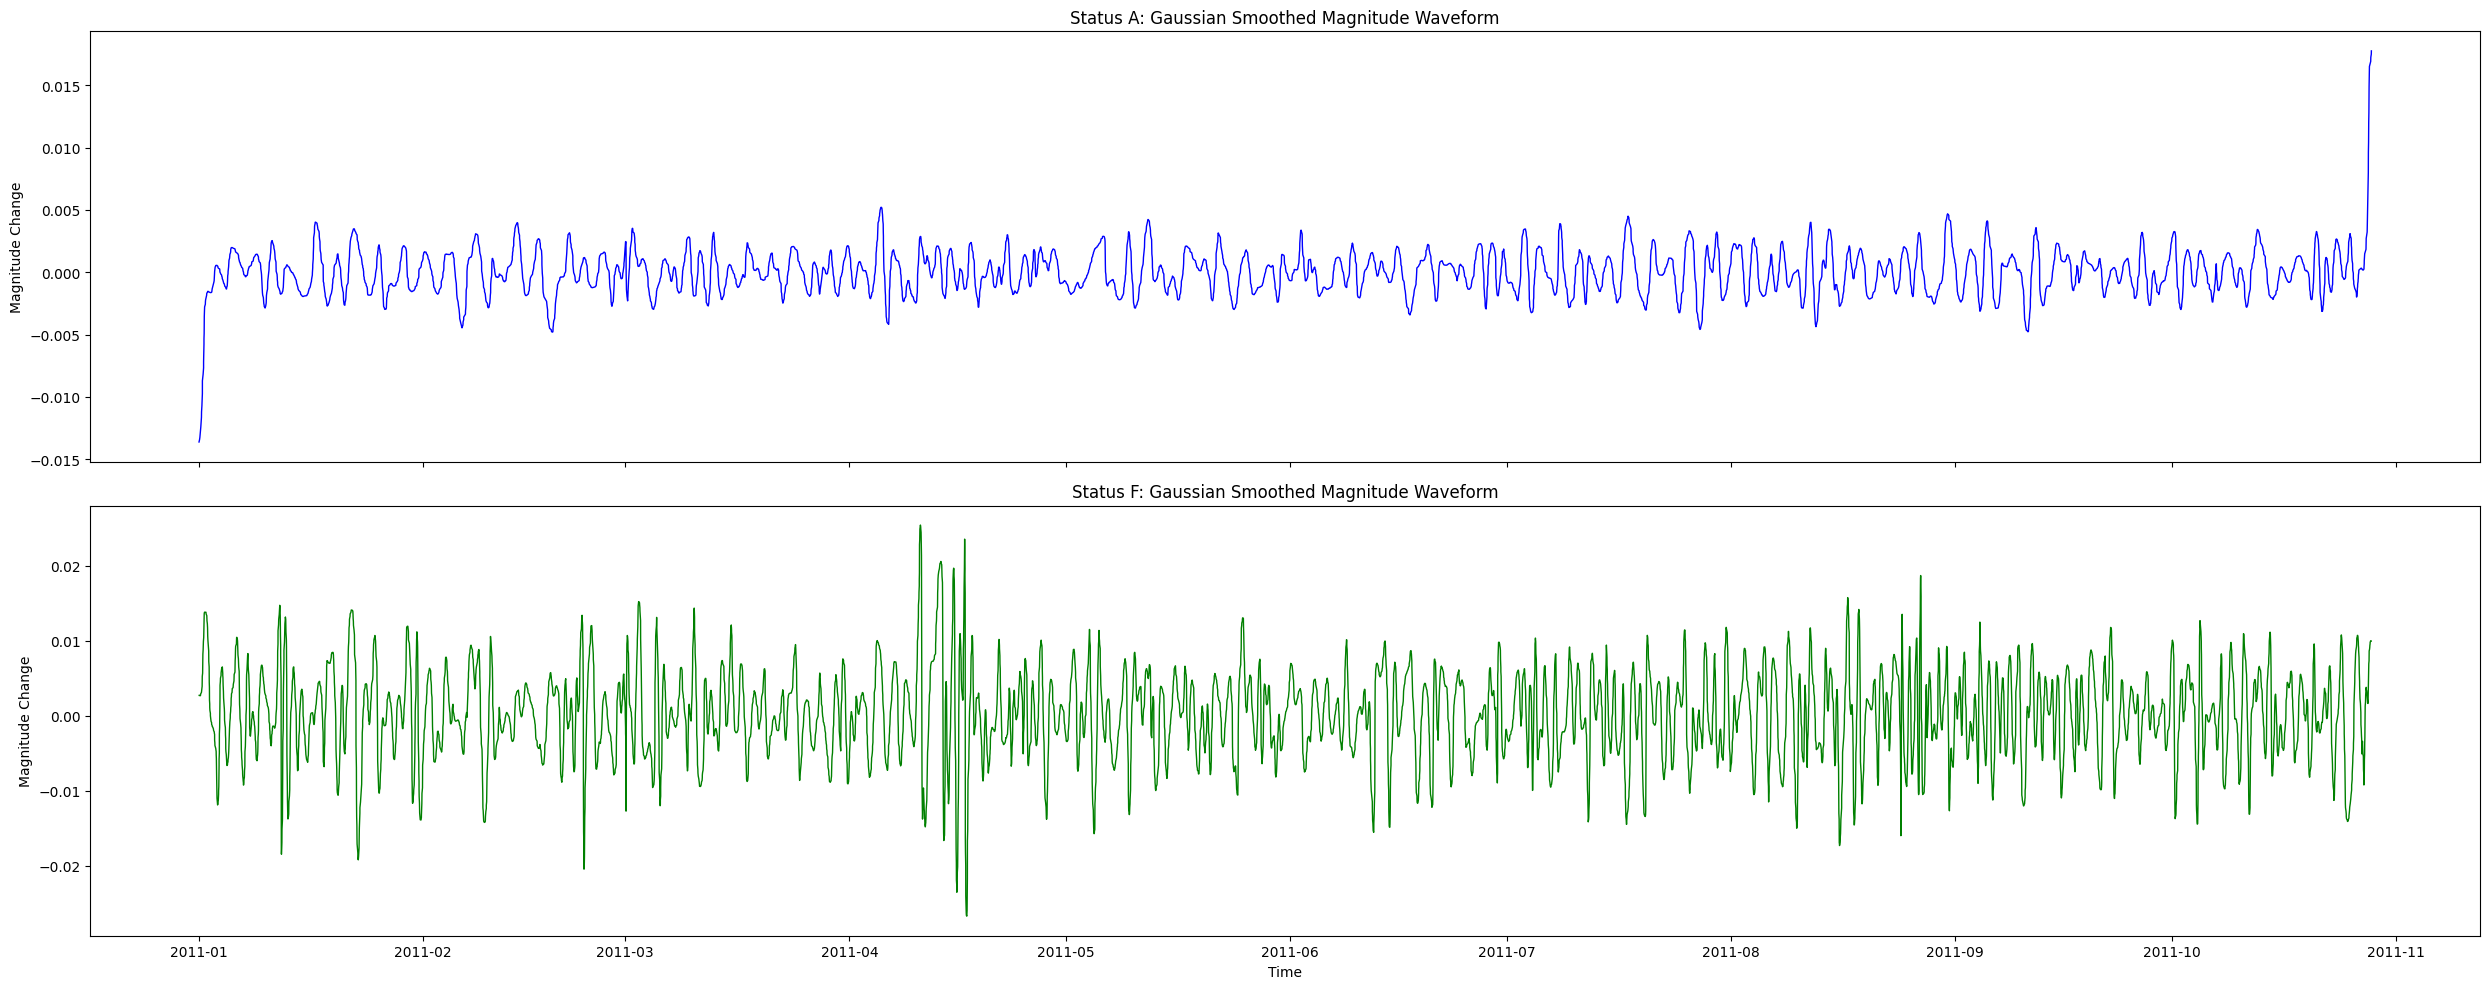

In [32]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd

# Assuming 'data' is your DataFrame
data['time'] = pd.to_datetime(data['time'])

train_size = int(0.8 * len(data))

# train_df will contain 80% of the data in chronological order
# test_df will contain 20% of the data in chronological order

train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

# Split data by status
data_A = train_df[train_df['status'] == 'A'].copy()
data_F = train_df[train_df['status'] == 'F'].copy()

data_A['magnitude_waveform'] = data_A['mag'].diff().fillna(0)
data_F['magnitude_waveform'] = data_F['mag'].diff().fillna(0)

sigma = 15
data_A['gaussian_smoothed_waveform'] = gaussian_filter1d(data_A['magnitude_waveform'], sigma=sigma)
data_F['gaussian_smoothed_waveform'] = gaussian_filter1d(data_F['magnitude_waveform'], sigma=sigma)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

ax[0].plot(data_A['time'], data_A['gaussian_smoothed_waveform'], color='blue', linewidth=1)
ax[0].set_title('Status A: Gaussian Smoothed Magnitude Waveform')
ax[0].set_ylabel('Magnitude Change')
ax[0].grid(False)

ax[1].plot(data_F['time'], data_F['gaussian_smoothed_waveform'], color='green', linewidth=1)
ax[1].set_title('Status F: Gaussian Smoothed Magnitude Waveform')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitude Change')
ax[1].grid(False)

plt.tight_layout()
plt.show()


In [12]:
ts1 = data_A[['time','gaussian_smoothed_waveform']].rename(columns={'gaussian_smoothed_waveform': 'mag_wf'})
ts2 = data_F[['time','gaussian_smoothed_waveform']].rename(columns={'gaussian_smoothed_waveform': 'mag_wf'})
display(ts1.head())
display(ts2.head())


,time,mag_wf
0,2011-01-01 00:21:06.570000+00:00,-0.013617
2,2011-01-01 00:58:13.270000+00:00,-0.013550
4,2011-01-01 02:04:41.480000+00:00,-0.013435
7,2011-01-01 03:11:04.720000+00:00,-0.013254
11,2011-01-01 04:07:14.660000+00:00,-0.013024


,time,mag_wf
1,2011-01-01 00:52:59.550000+00:00,0.002709
3,2011-01-01 01:44:16.230000+00:00,0.002714
5,2011-01-01 02:09:58.630000+00:00,0.002705
6,2011-01-01 02:53:49.640000+00:00,0.002697
8,2011-01-01 03:32:55.630000+00:00,0.002688


# Step 1 "Generate Shapelet Candidate":
---
We use 2 class from from the series that indicates as defined below:
- Type A: Attenuation Dominated (Low-Frequency) Ground Wave
- Type F: Field Strength Dominated (Higher-Frequency) Ground Wave

In [14]:
import pandas as pd
import numpy as np

def generate_shapelet_candidate(time_series, min_length=5, max_length=15, variance_threshold=0, debug=False):
    """
    Dynamically segment the time series into shapelet candidates based on variance.
    
    Parameters:
        time_series (np.array): The time series data.
        min_length (int): Minimum length of each segment.
        max_length (int): Maximum length of each segment.
        variance_threshold (float): Variance threshold for splitting segments.
        debug (bool): If True, print debug information about segment variances.
        
    Returns:
        list: A list of dynamically segmented shapelet candidates.
    """
    shapelet_candidates = []
    series_length = len(time_series)
    start_idx = 0

    while start_idx < series_length:
        segment_found = False

        for length in range(min_length, max_length + 1):
            end_idx = start_idx + length
            if end_idx > series_length:
                break
            segment = time_series[start_idx:end_idx]
            segment_variance = np.var(segment)

            if debug:
                print(f"Start: {start_idx}, End: {end_idx}, Segment: {segment}, Variance: {segment_variance}")

            # Split the segment if variance exceeds the threshold
            if segment_variance >= variance_threshold:
                shapelet_candidates.append(segment)
                start_idx = end_idx  # Move to the next segment
                segment_found = True
                break

        if not segment_found:
            start_idx += min_length

    if not shapelet_candidates and debug:
        print("No shapelet candidates found. Consider lowering the variance threshold or analyzing the data.")

    return shapelet_candidates

In [19]:
shapelet_candidates_A = generate_shapelet_candidate(
    ts1['mag_wf'].values, min_length=3, max_length=15
)

print(f"Number of Shapelet Candidates: {len(shapelet_candidates_A)}")
for idx, candidate in enumerate(shapelet_candidates_A[:5]):  # Print first 5 shapelets
    print(f"Shapelet {idx+1}: {candidate}")

Number of Shapelet Candidates: 3241
Shapelet 1: [-0.0136171  -0.01354996 -0.01343544]
Shapelet 2: [-0.0132541  -0.01302375 -0.01275131]
Shapelet 3: [-0.0124192  -0.01204024 -0.01163824]
Shapelet 4: [-0.0111903  -0.01072265 -0.0102387 ]
Shapelet 5: [-0.00973433 -0.00921964 -0.00870749]


In [16]:
shapelet_candidates_F = generate_shapelet_candidate(
    ts2['mag_wf'].values, min_length=5, max_length=15
)

print(f"Number of Shapelet Candidates: {len(shapelet_candidates_F)}")
for idx, candidate in enumerate(shapelet_candidates_F[:5]):  # Print first 5 shapelets
    print(f"Shapelet {idx+1}: {candidate}")

Number of Shapelet Candidates: 3387
Shapelet 1: [0.00270944 0.0027139  0.00270522 0.00269676 0.00268777]
Shapelet 2: [0.00270786 0.00267753 0.00269175 0.00269289 0.00270991]
Shapelet 3: [0.00273544 0.00276295 0.00282268 0.00291916 0.00300187]
Shapelet 4: [0.00311655 0.0032756  0.00344572 0.00365959 0.00391353]
Shapelet 5: [0.00417048 0.00450021 0.00484732 0.00525294 0.00566456]


## Step 2 "Calculate Shapelet Distance" & Step 3 "Assesment Shapelet Quality" & Step 4 "Discovery of Shapelet":

In [27]:
import numpy as np

def compute_shapelet_distances(shapelet, time_series):
    """
    Compute the squared Euclidean distance between a shapelet and all subsequences
    of the same length in the time series.
    """
    shapelet_length = len(shapelet)
    series_length = len(time_series)
    distances = []
    for start_idx in range(series_length - shapelet_length + 1):
        subsequence = time_series[start_idx:start_idx + shapelet_length]
        distance = np.sum((shapelet - subsequence) ** 2)  # Squared Euclidean Distance
        distances.append(distance)
    return np.array(distances)

def entropy(labels):
    """
    Calculate the entropy of a dataset.
    """
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    # Add small value to avoid log(0)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

def compute_information_gain(shapelet, time_series, labels):
    """
    Compute the Information Gain (IG) for a shapelet.
    """
    distances = compute_shapelet_distances(shapelet, time_series)
    total_size = len(distances)
    total_entropy = entropy(labels)  # H(T)
    
    print('now run:',shapelet)
    
    # Sort distances and labels
    sorted_indices = np.argsort(distances)
    sorted_labels = labels[sorted_indices]
    
    max_ig = 0
    
    for i in range(1, total_size):
        # Split the data at the current threshold
        T_x_labels = sorted_labels[:i]
        T_y_labels = sorted_labels[i:]
        
        # Calculate entropies of the subsets
        H_T_x = entropy(T_x_labels)
        H_T_y = entropy(T_y_labels)
        
        # Calculate the weighted average of subset entropies
        weighted_entropy = (len(T_x_labels) / total_size) * H_T_x + \
                           (len(T_y_labels) / total_size) * H_T_y
        
        # Calculate Information Gain
        ig = total_entropy - weighted_entropy
        
        # Track the maximum IG
        max_ig = max(max_ig, ig)
    
    return max_ig

In [28]:
valid_shapelets_A = []

labels = np.array([0, 1] * (len(ts1) // 2))[:len(ts1)]

for shapelet in shapelet_candidates_A:
    ig = compute_information_gain(shapelet, ts1['mag_wf'].values, labels)
    if 0 <= ig <= 1:  # Threshold 0-1
        valid_shapelets_A.append({"shapelet": shapelet, "IG": ig})

# Convert to structured array
valid_shapelets_array_A = np.array(valid_shapelets_A)

# Print results
print(f"Number of valid shapelets: {len(valid_shapelets_array_A)}")
for idx, entry in enumerate(valid_shapelets_array_A[:5]):  # Display first 5 valid shapelets
    print(f"Shapelet {idx + 1}: {entry['shapelet']}, IG: {entry['IG']:.4f}")


now run: [-0.0136171  -0.01354996 -0.01343544]
now run: [-0.0132541  -0.01302375 -0.01275131]
now run: [-0.0124192  -0.01204024 -0.01163824]
now run: [-0.0111903  -0.01072265 -0.0102387 ]
now run: [-0.00973433 -0.00921964 -0.00870749]
now run: [-0.00818192 -0.00766872 -0.00716593]
now run: [-0.00667811 -0.006211   -0.00575424]
now run: [-0.00532248 -0.00491592 -0.00453576]
now run: [-0.00417627 -0.00384469 -0.00354072]
now run: [-0.0032601  -0.00300194 -0.0027736 ]
now run: [-0.00256188 -0.00238169 -0.00221527]
now run: [-0.00207311 -0.00194817 -0.00184808]
now run: [-0.00176159 -0.00168763 -0.0016354 ]
now run: [-0.00158848 -0.00156132 -0.00154338]
now run: [-0.00153162 -0.00153161 -0.00154196]
now run: [-0.00155363 -0.00157009 -0.00158676]
now run: [-0.00160204 -0.00161634 -0.00163034]
now run: [-0.00163289 -0.00163257 -0.0016252 ]
now run: [-0.00160536 -0.00157438 -0.00153084]
now run: [-0.0014777  -0.00141299 -0.00133364]
now run: [-0.0012444  -0.00114688 -0.00102973]
now run: [-0.

In [48]:
print('Candidate',len(shapelet_candidates_A))
print('Assesment',len(valid_shapelets_array_A))
print(valid_shapelets_array_A[0])
saveValidShapeletAsCsv('../output/shapelet/series_a', valid_shapelets_array_A)

Candidate 3241
Assesment 3241
{'shapelet': array([-0.0136171 , -0.01354996, -0.01343544]), 'IG': 0.00010286712647944452}
Data saved to series_a.csv


In [45]:
valid_shapelets_F = []

labels = np.array([0, 1] * (len(ts2) // 2))[:len(ts2)]

for shapelet in shapelet_candidates_F:
    ig = compute_information_gain(shapelet, ts2['mag_wf'].values, labels)  # Pass valid labels
    if 0 <= ig <= 1:  # Threshold 0-1
        valid_shapelets_F.append({"shapelet": shapelet, "IG": ig})

# Convert to structured array
valid_shapelets_array_F = np.array(valid_shapelets_F)

# Print results
print(f"Number of valid shapelets: {len(valid_shapelets_array_F)}")
for idx, entry in enumerate(valid_shapelets_array_F[:5]):  # Display first 5 valid shapelets
    print(f"Shapelet {idx + 1}: {entry['shapelet']}, IG: {entry['IG']:.4f}")


now run: [0.00270944 0.0027139  0.00270522 0.00269676 0.00268777]
now run: [0.00270786 0.00267753 0.00269175 0.00269289 0.00270991]
now run: [0.00273544 0.00276295 0.00282268 0.00291916 0.00300187]
now run: [0.00311655 0.0032756  0.00344572 0.00365959 0.00391353]
now run: [0.00417048 0.00450021 0.00484732 0.00525294 0.00566456]
now run: [0.00614129 0.00661843 0.00713064 0.00766108 0.00821062]
now run: [0.00876667 0.00933381 0.00988175 0.01043084 0.01096564]
now run: [0.0114788  0.01194753 0.0123816  0.01277928 0.01312033]
now run: [0.01337149 0.01358542 0.01373384 0.01379119 0.01378358]
now run: [0.0137079  0.01355908 0.01333264 0.01303253 0.01265317]
now run: [0.01224707 0.01172426 0.0111888  0.01060907 0.00997873]
now run: [0.00930813 0.00863918 0.00794504 0.0072148  0.00650873]
now run: [0.00580961 0.0051141  0.00444435 0.00379529 0.00319228]
now run: [0.00261113 0.00207708 0.00156893 0.00111921 0.00070499]
now run: [ 3.26100795e-04 -3.34015325e-06 -2.86222149e-04 -5.35728248e-04
 -

In [12]:
print('Candidate',len(shapelet_candidates_F))
print('Assesment',len(valid_shapelets_array_F))
print(valid_shapelets_array_F[0])
saveValidShapeletAsCsv('../output/shapelet/series_f', valid_shapelets_array_F)

Candidate 3387
Assesment 3387
{'shapelet': [0.002709436395874497, 0.0027139032373274113, 0.0027052237960867587, 0.0026967598711727624, 0.00268776604232588], 'IG': 5.9062284649802343e-05}
Data saved to ../output/shapelet/series_f.csv


In [11]:
valid_shapelets_array_A = loadShapeletFromCsv('../output/shapelet/series_a')
valid_shapelets_array_F = loadShapeletFromCsv('../output/shapelet/series_f')

Selecting shapelet within treshold

In [14]:
discover_A = [item for item in valid_shapelets_array_A if 0.0005 <= item['IG'] <= 1]
discover_A = sorted(discover_A, key=lambda x: x['IG'], reverse=True)
display(len(discover_A))

286

In [15]:
discover_F = [item for item in valid_shapelets_array_F if 0.0005 <= item['IG'] <= 1]
discover_F = sorted(discover_F, key=lambda x: x['IG'], reverse=True)
display(len(discover_F))

16

# Step 5 "Shapelet Transform":

In [27]:
def visualizeShapeletTransform(label, data, legend=True):
    combined_shapelets = np.concatenate([entry['shapelet'] for entry in data])
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, len(data)))
    plt.plot(combined_shapelets, color='black', linestyle='--', label='Combined Shapelets', alpha=0.7)

    start_idx = 0
    for idx, entry in enumerate(data):
        shapelet = entry['shapelet']
        length = len(shapelet)
        end_idx = start_idx + length
        plt.plot(range(start_idx, end_idx), shapelet, color=colors[idx], label=f'Shapelet {idx+1}', alpha=0.9, linewidth=2)
        start_idx = end_idx

    plt.title(f'Shapelet Transform {label}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    if legend:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

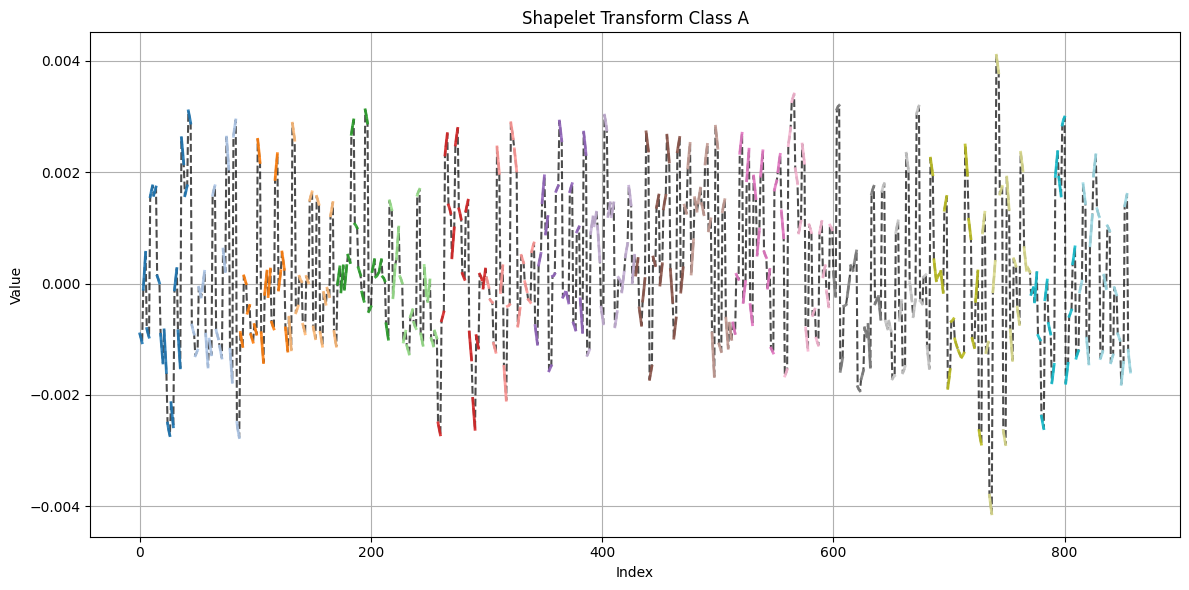

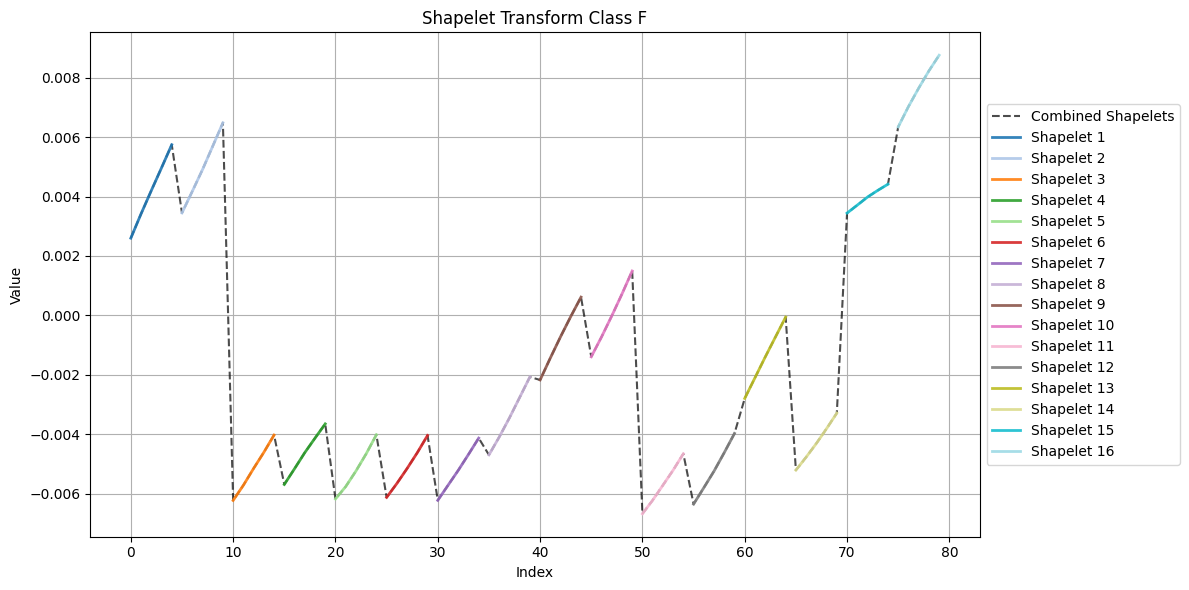

In [29]:
(visualizeShapeletTransform('Class A', discover_A, False))
(visualizeShapeletTransform('Class F', discover_F))

In [18]:
combined_shapelets_A = np.concatenate([entry['shapelet'] for entry in discover_A])
combined_shapelets_F = np.concatenate([entry['shapelet'] for entry in discover_F])

df_c_A = pd.DataFrame(combined_shapelets_A, columns=['mag'])
df_c_A.to_csv('../output/shapelet/combined_shapelets_A.csv', index=False)

df_c_F = pd.DataFrame(combined_shapelets_F, columns=['mag'])
df_c_F.to_csv('../output/shapelet/combined_shapelets_F.csv', index=False)


In [22]:
discover_F
def makeAsFeature(data, columns, label):
    df = pd.DataFrame([entry['shapelet'] for entry in data], columns=columns)
    df['class'] = label
    return df
df_A = makeAsFeature(discover_A, ['shapelet_1', 'shapelet_2', 'shapelet_3'], 'A')
df_A


,shapelet_1,shapelet_2,shapelet_3,class
0,-0.000904,-0.000979,-0.001064,A
1,-0.000104,0.000228,0.000561,A
2,-0.000809,-0.000891,-0.000963,A
3,0.001561,0.001661,0.001754,A
4,0.001584,0.001662,0.001734,A
...,...,...,...,...
281,-0.000073,-0.000141,-0.000203,A
282,-0.000903,-0.000961,-0.001021,A
283,-0.001810,-0.001620,-0.001416,A
284,0.001398,0.001501,0.001602,A


# Random Forest Classsification

In [47]:
def makeAsFeature(data, label):
    sequence = len(data[0]['shapelet'])
    columns = [f'shapelet_{i}' for i in range(1, sequence + 1)]
    df = pd.DataFrame([entry['shapelet'] for entry in data], columns=columns)
    df['class'] = label
    return df,sequence

In [52]:
# Preparing Test Set
test_df['magnitude_waveform'] = test_df['mag'].diff().fillna(0)
test_df['mag_wf'] = gaussian_filter1d(test_df['magnitude_waveform'], sigma=15)
testing_df = test_df[['time','mag_wf','status']].rename(columns={'status': 'class'})
testing_df

C:\Users\Hartawan\AppData\Local\Temp\ipykernel_21008\2114637424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['magnitude_waveform'] = test_df['mag'].diff().fillna(0)
C:\Users\Hartawan\AppData\Local\Temp\ipykernel_21008\2114637424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['mag_wf'] = gaussian_filter1d(test_df['magnitude_waveform'], sigma=15)


,time,mag_wf,class
26660,2011-10-28 15:05:19.170000+00:00,0.027145,F
26661,2011-10-28 15:16:35.830000+00:00,0.027015,A
26662,2011-10-28 15:43:58.470000+00:00,0.026732,F
26663,2011-10-28 15:54:29.160000+00:00,0.026313,F
26664,2011-10-28 16:04:24.380000+00:00,0.025745,F
...,...,...,...
33321,2011-12-31 22:27:19.240000+00:00,0.012356,A
33322,2011-12-31 22:42:22.530000+00:00,0.012705,A
33323,2011-12-31 23:06:25.310000+00:00,0.012964,F
33324,2011-12-31 23:24:30.610000+00:00,0.013129,F


In [55]:
def create_shapelet_dataframe(df, N):
    mag_wf = df['mag_wf'].values
    classes = df['class'].values
    shapelets = []
    shapelet_classes = []
    for i in range(len(mag_wf) - N + 1):
        shapelets.append(mag_wf[i:i + N])
        shapelet_classes.append(classes[i + N - 1])
    shapelet_df = pd.DataFrame(shapelets, columns=[f'shapelet_{i+1}' for i in range(N)])
    shapelet_df['class'] = shapelet_classes
    
    return shapelet_df

In [56]:
# Not Used
testing_df_3 = create_shapelet_dataframe(testing_df, 3)
testing_df_3.head(3)

,shapelet_1,shapelet_2,shapelet_3,class
0,0.027145,0.027015,0.026732,F
1,0.027015,0.026732,0.026313,F
2,0.026732,0.026313,0.025745,F


In [57]:
testing_df_5 = create_shapelet_dataframe(testing_df, 5)
testing_df_5.head(3)

,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,class
0,0.027145,0.027015,0.026732,0.026313,0.025745,F
1,0.027015,0.026732,0.026313,0.025745,0.025053,A
2,0.026732,0.026313,0.025745,0.025053,0.024261,A


In [48]:
# Make Feature
df_A, num_shapelet_A = makeAsFeature(discover_A, 'A')
df_F, num_shapelet_F = makeAsFeature(discover_F, 'F')

In [49]:
print('Num. shapelet (A): ',num_shapelet_A)
display(df_A.head())
print('Num. shapelet (F): ',num_shapelet_F)
display(df_F.head())

Num. shapelet (A):  3


,shapelet_1,shapelet_2,shapelet_3,class
0,-0.000904,-0.000979,-0.001064,A
1,-0.000104,0.000228,0.000561,A
2,-0.000809,-0.000891,-0.000963,A
3,0.001561,0.001661,0.001754,A
4,0.001584,0.001662,0.001734,A


Num. shapelet (F):  5


,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,class
0,0.002600,0.003417,0.004198,0.004964,0.005741,F
1,0.003448,0.004168,0.004899,0.005688,0.006478,F
2,-0.006218,-0.005708,-0.005143,-0.004601,-0.004020,F
3,-0.005680,-0.005152,-0.004612,-0.004124,-0.003644,F
4,-0.006169,-0.005753,-0.005231,-0.004651,-0.004010,F


In [93]:
# Strech dimension 
def stretch_shapelets(df, target_shapelet_size=5):
    expanded_data = []
    for _, row in df.iterrows():
        shapelets = row[['shapelet_1', 'shapelet_2', 'shapelet_3']].values
        last_value = shapelets[-1]
        stretched_shapelet = np.linspace(shapelets[0], last_value, target_shapelet_size)
        expanded_data.append(list(stretched_shapelet) + [row['class']])
    
    # Create expanded DataFrame
    columns = [f'shapelet_{i+1}' for i in range(target_shapelet_size)] + ['class']
    expanded_df = pd.DataFrame(expanded_data, columns=columns)
    
    return expanded_df

df_A_expand = stretch_shapelets(df_A, target_shapelet_size=5)
display(df_F.head())

,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,class
0,0.002600,0.003417,0.004198,0.004964,0.005741,F
1,0.003448,0.004168,0.004899,0.005688,0.006478,F
2,-0.006218,-0.005708,-0.005143,-0.004601,-0.004020,F
3,-0.005680,-0.005152,-0.004612,-0.004124,-0.003644,F
4,-0.006169,-0.005753,-0.005231,-0.004651,-0.004010,F


In [94]:
X = pd.concat([df_A_expand, df_F], axis=0)
display(X.head())
display(X.tail())

,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,class
0,-0.000904,-0.000944,-0.000984,-0.001024,-0.001064,A
1,-0.000104,0.000062,0.000229,0.000395,0.000561,A
2,-0.000809,-0.000848,-0.000886,-0.000925,-0.000963,A
3,0.001561,0.001609,0.001657,0.001706,0.001754,A
4,0.001584,0.001622,0.001659,0.001697,0.001734,A


,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,class
11,-0.006342,-0.005791,-0.005232,-0.004610,-0.003964,F
12,-0.002788,-0.002095,-0.001398,-0.000725,-0.000054,F
13,-0.005200,-0.004763,-0.004302,-0.003804,-0.003282,F
14,0.003443,0.003710,0.003981,0.004205,0.004414,F
15,0.006341,0.007023,0.007643,0.008224,0.008749,F


In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Training RF

In [95]:
X_train = X.drop(columns=['class'])
y_train = X['class']
X_test = testing_df_5.drop(columns=['class'])
y_test = testing_df_5['class']

In [114]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=20, min_samples_leaf=4, random_state=1922)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
proba = rf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Prepare data for plotting
test_indices = X_test.index
actual = pd.Series(y_test.values, index=test_indices)
predicted = pd.Series(y_pred, index=test_indices)


confidence = proba.max(axis=1)

results_df = pd.DataFrame({
    'Predicted_Class': y_pred,
    'Confidence': confidence
})

Model Accuracy: 0.50


In [123]:
proba = rf.predict_proba(X_test)

proba_df = pd.DataFrame(proba, columns=[f'Proba_{cls}' for cls in rf.classes_])

testing_predictions = pd.DataFrame(X_test, columns=testing_df_5.columns)
testing_predictions['Actual'] = y_test.values
testing_predictions['Predicted'] = y_pred
testing_predictions = pd.concat([testing_predictions, proba_df], axis=1)
testing_predictions.reset_index(drop=True, inplace=True)
testing_predictions.drop('class', axis=1, inplace=True, errors='ignore')
testing_predictions.head()


,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,Actual,Predicted,Proba_A,Proba_F
0,0.027145,0.027015,0.026732,0.026313,0.025745,F,F,0.37671,0.62329
1,0.027015,0.026732,0.026313,0.025745,0.025053,A,F,0.37671,0.62329
2,0.026732,0.026313,0.025745,0.025053,0.024261,A,F,0.37671,0.62329
3,0.026313,0.025745,0.025053,0.024261,0.023337,F,F,0.37671,0.62329
4,0.025745,0.025053,0.024261,0.023337,0.022339,A,F,0.37671,0.62329


In [124]:
testing_predictions.groupby('Actual')['Predicted'].value_counts()

Actual  Predicted
A       A            1587
        F            1316
F       A            2031
        F            1728
Name: Predicted, dtype: int64

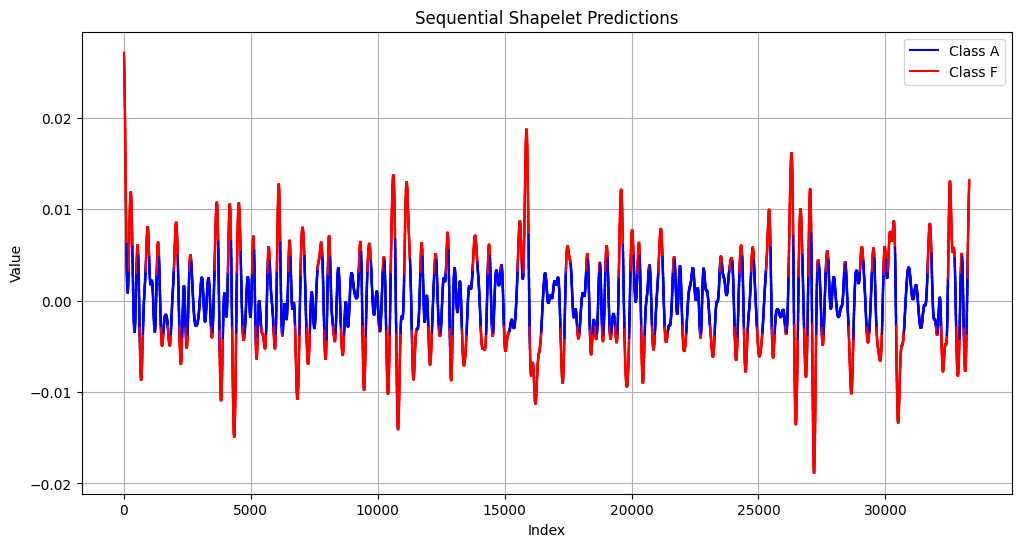

In [128]:
# Create a sequence of data points
class_mapping = {'A': 'blue', 'F': 'red'}  # Define colors for classes
colors = testing_predictions['Predicted'].map(class_mapping)  # Map colors to predictions

# Sequentially plot each 5-sequence window
plt.figure(figsize=(12, 6))

for i in range(len(testing_predictions)):
    sequence = testing_predictions.loc[i, ['shapelet_1', 'shapelet_2', 'shapelet_3', 'shapelet_4', 'shapelet_5']]
    plt.plot(range(i * 5, (i + 1) * 5), sequence, color=colors[i], linestyle='-')  # Removed 'marker' argument

# Add legend for classes
for cls, color in class_mapping.items():
    plt.plot([], [], color=color, label=f'Class {cls}')  # Dummy lines for legend

plt.title("Sequential Shapelet Predictions")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Not Used 🗑️

## Training RF A

In [62]:
X_train_A = df_A.drop(columns=['class'])
y_train_A = df_A['class']
X_test_A = testing_df_3.drop(columns=['class'])
y_test_A = testing_df_3['class']

In [72]:
rf_A = RandomForestClassifier(n_estimators=100, random_state=1922)
rf_A.fit(X_train_A, y_train_A)
# Make predictions
y_pred_A = rf_A.predict(X_test_A)

# Evaluate the model
accuracy = accuracy_score(y_test_A, y_pred_A)
print(f"Model Accuracy: {accuracy:.2f}")

# Prepare data for plotting
test_indices_A = X_test_A.index
actual_A = pd.Series(y_test_A.values, index=test_indices_A)
predicted_A = pd.Series(y_pred_A, index=test_indices_A)

Model Accuracy: 0.44


In [88]:
# Combine testing inputs, actual labels, and predictions into a DataFrame
testing_predictions = pd.DataFrame(X_test_A, columns=testing_df_3.columns)
testing_predictions['Actual'] = y_test_A.values
testing_predictions['Predicted'] = y_pred_A

# Reset the index for clarity
testing_predictions.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
testing_predictions.drop('class', axis=1, inplace=True)
testing_predictions


,shapelet_1,shapelet_2,shapelet_3,Actual,Predicted
0,0.027145,0.027015,0.026732,F,A
1,0.027015,0.026732,0.026313,F,A
2,0.026732,0.026313,0.025745,F,A
3,0.026313,0.025745,0.025053,A,A
4,0.025745,0.025053,0.024261,A,A
...,...,...,...,...,...
6659,0.011439,0.011940,0.012356,A,A
6660,0.011940,0.012356,0.012705,A,A
6661,0.012356,0.012705,0.012964,F,A
6662,0.012705,0.012964,0.013129,F,A


## Training RF F

In [64]:
X_train_F = df_F.drop(columns=['class'])
y_train_F = df_F['class']
X_test_F = testing_df_5.drop(columns=['class'])
y_test_F = testing_df_5['class']

In [73]:
rf_F = RandomForestClassifier(n_estimators=100, random_state=1922)
rf_F.fit(X_train_F, y_train_F)
# Make predictions
y_pred_F = rf_F.predict(X_test_F)

# Evaluate the model
accuracy = accuracy_score(y_test_F, y_pred_F)
print(f"Model Accuracy: {accuracy:.2f}")

# Prepare data for plotting
test_indices_F = X_test_F.index
actual_F = pd.Series(y_test_F.values, index=test_indices_F)
predicted_F = pd.Series(y_pred_F, index=test_indices_F)

Model Accuracy: 0.56


## Visualization

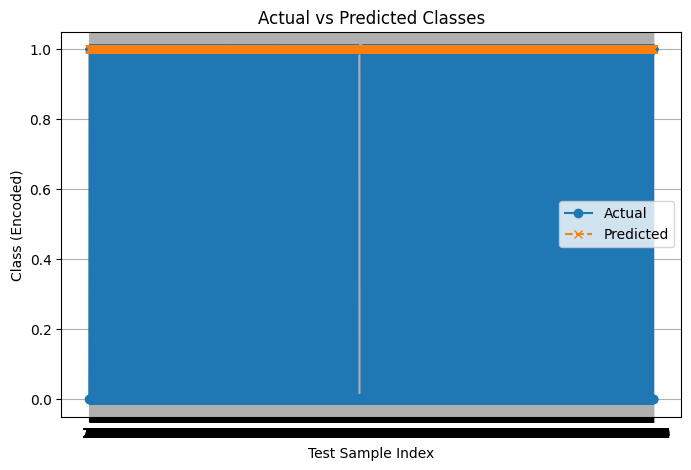